In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Read in data and evaluate the different fields

In [3]:
dat = pd.read_csv('../../data/raw/chi_dept_public_health/West_Nile_Virus__WNV__Mosquito_Test_Results.csv')
dat.head(5)

SEASON YEAR  WEEK  TEST ID                  BLOCK  TRAP TRAP_TYPE  \
0         2011    29    31550  100XX W OHARE AIRPORT  T916    GRAVID   
1         2016    25    42613      58XX N PULASKI RD  T027    GRAVID   
2         2007    27    20583     15XX W WEBSTER AVE  T045    GRAVID   
3         2009    38    28275      5XX S CENTRAL AVE  T031    GRAVID   
4         2011    34    32254      58XX N PULASKI RD  T027    GRAVID   

                TEST DATE  NUMBER OF MOSQUITOES    RESULT  \
0  07/25/2011 12:07:00 AM                     3  negative   
1  06/22/2016 12:06:00 AM                     6  negative   
2  07/11/2007 03:07:41 AM                     4  negative   
3  09/25/2009 12:09:00 AM                     4  negative   
4  08/26/2011 12:08:00 AM                     2  negative   

                  SPECIES   LATITUDE  LONGITUDE  \
0           CULEX PIPIENS        NaN        NaN   
1          CULEX RESTUANS  41.986320 -87.728378   
2  CULEX PIPIENS/RESTUANS  41.921705 -87.666963   
3           CULEX PIPIENS  41.872873 -87.764737   
4          CULEX RESTUANS  41.986320 -87.728378   

                                   LOCATION  
0                                       NaN  
1  (41.986319851449004, -87.72837845617912)  
2   (41.92170457422864, -87.66696323469388)  
3    (41.87287286249572, -87.7647365320396)  
4  (41.986319851449004, -87.72837845617912)

## plot pos/neg by trap to see if there's anything that stands out in proportions 

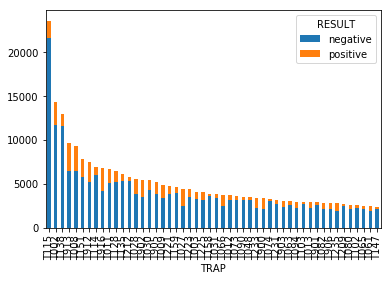

In [5]:
traps = pd.pivot_table(dat,
                      index = 'TRAP',
                      columns = 'RESULT',
                      values = ["NUMBER OF MOSQUITOES", "SPECIES"],
                      aggfunc = {"NUMBER OF MOSQUITOES": "sum", "SPECIES": "count"}).fillna(0)

traps['total'] = traps['NUMBER OF MOSQUITOES'].positive + traps['NUMBER OF MOSQUITOES'].negative

traps[['NUMBER OF MOSQUITOES', 'total']].sort_values("total", ascending = False)['NUMBER OF MOSQUITOES'].head(50).plot(kind = 'bar', stacked = True)

It doesn't look like there's anything obvious with proportions, though the number of mosquitoes caught seems to be concentrated heavily in teh top 10 or so traps (out of almost 200)

## plot pos/neg by species

SPECIES
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.160136
CULEX PIPIENS/RESTUANS    0.220573
CULEX RESTUANS            0.155913
CULEX SALINARIUS          0.020690
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.007251
UNSPECIFIED CULEX         0.000000
dtype: float64


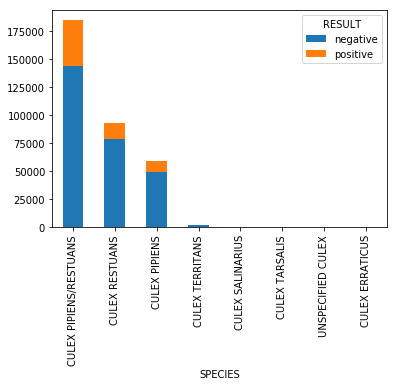

In [6]:
species = pd.pivot_table(dat,
                      index = 'SPECIES',
                      columns = 'RESULT',
                      values = ["NUMBER OF MOSQUITOES", ],
                      aggfunc = {"NUMBER OF MOSQUITOES": "sum", }).fillna(0)

species['total'] = species['NUMBER OF MOSQUITOES'].positive + species['NUMBER OF MOSQUITOES'].negative
print(species['NUMBER OF MOSQUITOES'].positive/species.total)
species[['NUMBER OF MOSQUITOES', 'total']].sort_values("total", ascending = False)['NUMBER OF MOSQUITOES'].plot(kind = 'bar', stacked = True)

The top three species make up almost the entirety of observations, and CULEX PIPIENS/RESTUANS is 22% positive, by far the highest rate

## plot pos/neg by trap type

TRAP_TYPE
CDC         0.093904
GRAVID      0.200486
OVI         0.000000
SENTINEL    0.303418
dtype: float64


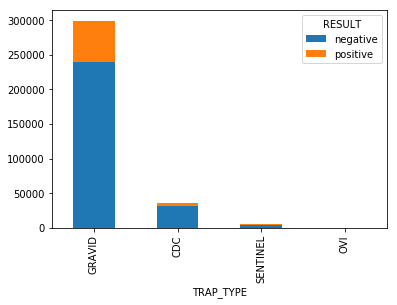

In [7]:
traptype = pd.pivot_table(dat,
                      index = 'TRAP_TYPE',
                      columns = 'RESULT',
                      values = ["NUMBER OF MOSQUITOES", ],
                      aggfunc = {"NUMBER OF MOSQUITOES": "sum", }).fillna(0)

traptype['total'] = traptype['NUMBER OF MOSQUITOES'].positive + traptype['NUMBER OF MOSQUITOES'].negative
print(traptype['NUMBER OF MOSQUITOES'].positive/traptype.total)
traptype[['NUMBER OF MOSQUITOES', 'total']].sort_values("total", ascending = False)['NUMBER OF MOSQUITOES'].plot(kind = 'bar', stacked = True)

Sentinal trap types are relatively rare, but 30% of the mosquitoes trapped in them are positive, which is a 10% higher rate than Gravid, the next-highest rate. 

## plot pos/neg by BLOCK

BLOCK
100XX W OHARE                         0.199836
100XX W OHARE AIRPORT                 0.290311
101XX S STONY ISLAND AVE              0.150590
104XX S OGLESBY AVE                   0.000000
104XX S VINCENNES AVE                 0.127052
104XX S WALLACE ST                    0.000000
105XX S CALIFORNIA AVE                0.000000
109XX S COTTAGE GROVE AVE             0.111024
10XX E 67TH ST                        0.113605
10XX W 95TH ST                        0.023669
111XX S ARTESIAN AVE                  0.014085
112XX S WALLACE ST                    0.000000
115XX S AVENUE L                      0.092448
115XX S LOOMIS ST                     0.304000
119XX S ASHLAND AVE                   0.106970
119XX S PEORIA ST                     0.053030
119XX S STATE ST                      0.000000
11XX S CALIFORNIA AVE                 0.055122
11XX W CHICAGO AVE                    0.106151
11XX W ROOSEVELT RD                   0.083213
122XX S STONY ISLAND AVE              0.124031
127XX S

<IPython.core.display.Javascript object>


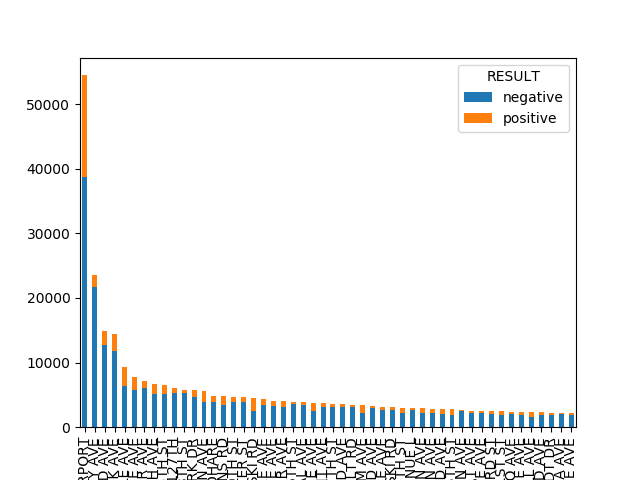

In [37]:
block = pd.pivot_table(dat,
                      index = 'BLOCK',
                      columns = 'RESULT',
                      values = ["NUMBER OF MOSQUITOES", ],
                      aggfunc = {"NUMBER OF MOSQUITOES": "sum", }).fillna(0)

block['total'] = block['NUMBER OF MOSQUITOES'].positive + block['NUMBER OF MOSQUITOES'].negative
print(block['NUMBER OF MOSQUITOES'].positive/traptype.total)
block[['NUMBER OF MOSQUITOES', 'total']].sort_values("total", ascending = False)['NUMBER OF MOSQUITOES'].head(50).plot(kind = 'bar', stacked = True)

In [38]:
block['posprop'] = block['NUMBER OF MOSQUITOES'].positive/block.total
block.sort_values('posprop', ascending = False).head(30)

NUMBER OF MOSQUITOES             total   posprop
RESULT                            negative positive                   
BLOCK                                                                 
37XX N KILBOURN AVE                   48.0     83.0    131.0  0.633588
65XX N OAK PARK AVE                   87.0    143.0    230.0  0.621739
51XX W 63RD PL                       265.0    305.0    570.0  0.535088
58XX N PULASKI RD                   2548.0   2020.0   4568.0  0.442207
60XX N AVONDALE AVE                   61.0     46.0    107.0  0.429907
60XX W ROSCOE ST                      33.0     17.0     50.0  0.340000
71XX N HARLEM AVE                   2275.0   1095.0   3370.0  0.324926
2XX W 89TH ST                        345.0    165.0    510.0  0.323529
67XX S KEDZIE AVE                   2497.0   1182.0   3679.0  0.321283
72XX N OKETO AVE                    1266.0    583.0   1849.0  0.315306
45XX N CAMPBELL AVE                 1588.0    722.0   2310.0  0.312554
70XX N MOSELLE AVE                  6429.0   2900.0   9329.0  0.310859
115XX S LOOMIS ST                     87.0     38.0    125.0  0.304000
12XX W 120TH ST                       30.0     13.0     43.0  0.302326
58XX N WESTERN AVE                  3870.0   1664.0   5534.0  0.300687
91XX W HIGGINS RD                   3373.0   1440.0   4813.0  0.299190
42XX W 65TH ST                      1950.0    829.0   2779.0  0.298309
100XX W OHARE AIRPORT              38666.0  15817.0  54483.0  0.290311
21XX N CANNON DR                     299.0    116.0    415.0  0.279518
14XX W 112TH ST                      346.0    126.0    472.0  0.266949
70XX W ARMITAGE AVE                 5756.0   2060.0   7816.0  0.263562
25XX W GRAND AVE                    2078.0    719.0   2797.0  0.257061
52XX S NORDICA AVE                    67.0     23.0     90.0  0.255556
61XX W FULLERTON AVE                2190.0    724.0   2914.0  0.248456
22XX W 51ST ST                      1856.0    604.0   2460.0  0.245528
50XX S UNION AVE                    2123.0    686.0   2809.0  0.244215
36XX N PITTSBURGH AVE               5108.0   1636.0   6744.0  0.242586
17XX W 95TH ST                      2273.0    704.0   2977.0  0.236480
81XX S ASHLAND                      1077.0    298.0   1375.0  0.216727
82XX S KOSTNER AVE                  3175.0    869.0   4044.0  0.214886

In [ ]:
The location is obviously very important as some blocks have 60%+ positive rates. The 5800 N block of Pulaski has "only" a 44% positive rate, but with more than 4500 captured mosquitoes that is quite high.

## map it out

In [71]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from area import area
from folium.element import IFrame 

# import geopandas as gpd
import json

ModuleNotFoundError: No module named 'folium.element'

In [79]:
positives = dat.loc[dat.RESULT == 'positive', ["BLOCK", "NUMBER OF MOSQUITOES", "LATITUDE", "LONGITUDE"]].dropna()
# for police_station in police_stations:
#     police_station_location =(police_station[0],police_station[1])
#     cursor.execute("SELECT PRIMARY_TYPE, count(PRIMARY_TYPE) from crimes where district =%s AND PRIMARY_TYPE in %s GROUP BY PRIMARY_TYPE",[police_station[2],violent_crime_categories])
#     data = cursor.fetchall()
# violent_crimes_per_district_df = pd.DataFrame(data, columns=['Description', 'Number of Violent Crimes'])
# locs = positives.LOCATION
# header = positives.to_html(classes='table table-striped table-hover table-condensed table-responsive')
# folium.Marker(location=locs, popup=folium.Popup(html="Number Mosquitoes: ".format('hi'))).add_to(chi_map)


# positives.head()

In [80]:
chi_map = folium.Map(location = (41.8781, -87.6298), zoom_start = 11)
my_marker_cluster = MarkerCluster().add_to(chi_map) 
# chi_map
# chi_map.choropleth(geo_data = "Boundaries.geojson",
#                   fill_color = "OrRd",
#                   fill_opacity = 1,
#                   data = positives,
#                   key_on = 'BLOCK',
#                   columns = ['NUMBER OF MOSQUITOES',"LATITUDE", "LONGITUDE",],)
chi_map

In [82]:
for ix, row in positives.iterrows(): 
#     print(ix, row)
    text = "Name: " + row['BLOCK'] 
    popup = folium.Popup(folium.IFrame(text, width=300, height=100)) 
    folium.Marker(location = [row['LATITUDE'],row['LONGITUDE']], popup=popup).add_to(my_marker_cluster)
chi_map.save("postiivemosquitoes_map.html")
chi_map